In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#reading the dataset
def read_dataset():
    df = pd.read_csv("./dataset/sonar.csv")
    print(len(df.columns))
    X = df[df.columns[1:60]].values
    y = df[df.columns[60]]
    #Encode the dependent variable
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    print(X.shape)
    return (X, Y, y)

In [3]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [4]:
def plot_points(features, labels):
    normal = np.where(labels == 0)
    outliers = np.where(labels == 1)
    fig = plt.figure(figsize=(10, 8))
    plt.plot(features[normal, 0], features[normal, 1], 'bx')
    plt.plot(features[outliers, 0], features[outliers, 1], 'ro')
    plt.xlabel('Latency (ms)')
    plt.ylabel('Throughput (mb/s)')
    plt.show()

61
(207, 59)


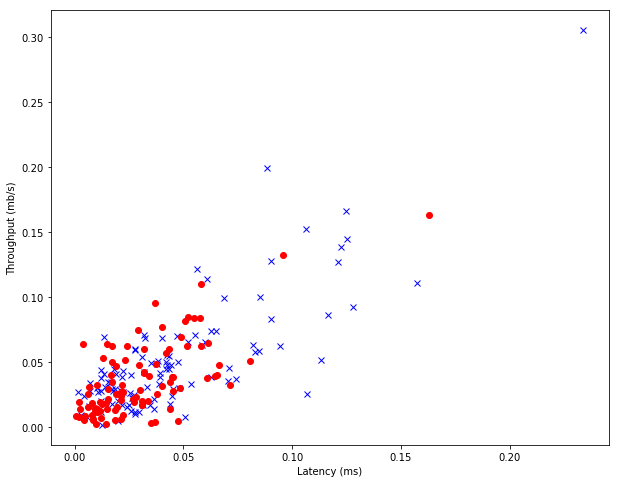

In [6]:
X, Y, y = read_dataset()
#plot the features and the labels
plot_points(X,y)

In [13]:
#Shuffle the dataset to mix up the rows.
X, Y = shuffle(X, Y, random_state=1)
#convert the dataset into train and test part
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=415)

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(165, 59)
(165, 2)
(42, 59)
(42, 2)


### Set up your Network Hyper Parameters



In [20]:
# Training Parameters for basic MNIST
learning_rate = 0.1
training_epochs = 1000
batch_size = 100

# Network Parameters
n_input = 59
n_hidden_1 = 100 
n_hidden_2 = 100
n_classes = 2

In [21]:
model = Sequential()
model.add(Dense(n_hidden_1, activation='relu',  input_shape=(n_input,), name = "Dense_1"))


model.add(Dense(n_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 100)               6000      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 6,202
Trainable params: 6,202
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 165 samples, validate on 42 samples
Epoch 1/1000
165/165 [==============================] - 1s - loss: 0.7638 - acc: 0.4242 - val_loss: 0.6952 - val_acc: 0.5714
Epoch 2/1000
165/165 [==============================] - 0s - loss: 0.7425 - acc: 0.4303 - val_loss: 0.6989 - val_acc: 0.4286
Epoch 3/1000
165/165 [==============================] - 0s - loss: 0.7274 - acc: 0.4000 - val_loss: 0.7036 - val_acc: 0.4524
Epoch 4/1000
165/165 [==============================] - 0s - loss: 0.7176 - acc: 0.3879 - val_loss: 0.7076 - val_acc: 0.4048
Epoch 5/1000
165/165 [==============================] - 0s - loss: 0.7090 - acc: 0.4061 - val_loss: 0.7129 - val_acc: 0.3333
Epoch 6/1000
165/165 [==============================] - 0s - loss: 0.7026 - acc: 0.4667 - val_loss: 0.7170 - val_acc: 0.3571
Epoch 7/1000
165/165 [==============================] - 0s - loss: 0.6974 - acc: 0.4788 - val_loss: 0.7216 - val_acc: 0.3810
Epoch 8/1000
165/165 [==============================] - 0s - loss: 0.6932 - acc:

165/165 [==============================] - 0s - loss: 0.6395 - acc: 0.6424 - val_loss: 0.7137 - val_acc: 0.4048
Epoch 66/1000
165/165 [==============================] - 0s - loss: 0.6403 - acc: 0.6424 - val_loss: 0.7101 - val_acc: 0.4048
Epoch 67/1000
165/165 [==============================] - 0s - loss: 0.6385 - acc: 0.6545 - val_loss: 0.7106 - val_acc: 0.4048
Epoch 68/1000
165/165 [==============================] - 0s - loss: 0.6380 - acc: 0.6545 - val_loss: 0.7109 - val_acc: 0.4048
Epoch 69/1000
165/165 [==============================] - 0s - loss: 0.6385 - acc: 0.6545 - val_loss: 0.7132 - val_acc: 0.4048
Epoch 70/1000
165/165 [==============================] - 0s - loss: 0.6371 - acc: 0.6545 - val_loss: 0.7111 - val_acc: 0.4048
Epoch 71/1000
165/165 [==============================] - 0s - loss: 0.6364 - acc: 0.6545 - val_loss: 0.7110 - val_acc: 0.4048
Epoch 72/1000
165/165 [==============================] - 0s - loss: 0.6363 - acc: 0.6545 - val_loss: 0.7085 - val_acc: 0.4286
Epoch 

165/165 [==============================] - 0s - loss: 0.6105 - acc: 0.7091 - val_loss: 0.6865 - val_acc: 0.5238
Epoch 130/1000
165/165 [==============================] - 0s - loss: 0.6102 - acc: 0.6970 - val_loss: 0.6845 - val_acc: 0.5238
Epoch 131/1000
165/165 [==============================] - 0s - loss: 0.6099 - acc: 0.7152 - val_loss: 0.6855 - val_acc: 0.5238
Epoch 132/1000
165/165 [==============================] - 0s - loss: 0.6093 - acc: 0.7030 - val_loss: 0.6850 - val_acc: 0.5238
Epoch 133/1000
165/165 [==============================] - 0s - loss: 0.6093 - acc: 0.7030 - val_loss: 0.6862 - val_acc: 0.5238
Epoch 134/1000
165/165 [==============================] - 0s - loss: 0.6086 - acc: 0.6970 - val_loss: 0.6843 - val_acc: 0.5238
Epoch 135/1000
165/165 [==============================] - 0s - loss: 0.6081 - acc: 0.7152 - val_loss: 0.6840 - val_acc: 0.5238
Epoch 136/1000
165/165 [==============================] - 0s - loss: 0.6077 - acc: 0.7152 - val_loss: 0.6826 - val_acc: 0.5238

165/165 [==============================] - 0s - loss: 0.5867 - acc: 0.7515 - val_loss: 0.6558 - val_acc: 0.6190
Epoch 194/1000
165/165 [==============================] - 0s - loss: 0.5862 - acc: 0.7515 - val_loss: 0.6560 - val_acc: 0.5714
Epoch 195/1000
165/165 [==============================] - 0s - loss: 0.5858 - acc: 0.7515 - val_loss: 0.6559 - val_acc: 0.5952
Epoch 196/1000
165/165 [==============================] - 0s - loss: 0.5855 - acc: 0.7515 - val_loss: 0.6563 - val_acc: 0.5714
Epoch 197/1000
165/165 [==============================] - 0s - loss: 0.5852 - acc: 0.7515 - val_loss: 0.6562 - val_acc: 0.5714
Epoch 198/1000
165/165 [==============================] - 0s - loss: 0.5849 - acc: 0.7576 - val_loss: 0.6550 - val_acc: 0.5952
Epoch 199/1000
165/165 [==============================] - 0s - loss: 0.5845 - acc: 0.7515 - val_loss: 0.6539 - val_acc: 0.6190
Epoch 200/1000
165/165 [==============================] - 0s - loss: 0.5842 - acc: 0.7515 - val_loss: 0.6545 - val_acc: 0.5952

165/165 [==============================] - 0s - loss: 0.5650 - acc: 0.7515 - val_loss: 0.6288 - val_acc: 0.6429
Epoch 258/1000
165/165 [==============================] - 0s - loss: 0.5649 - acc: 0.7515 - val_loss: 0.6306 - val_acc: 0.6429
Epoch 259/1000
165/165 [==============================] - 0s - loss: 0.5643 - acc: 0.7515 - val_loss: 0.6302 - val_acc: 0.6429
Epoch 260/1000
165/165 [==============================] - 0s - loss: 0.5640 - acc: 0.7515 - val_loss: 0.6307 - val_acc: 0.6429
Epoch 261/1000
165/165 [==============================] - 0s - loss: 0.5637 - acc: 0.7515 - val_loss: 0.6297 - val_acc: 0.6429
Epoch 262/1000
165/165 [==============================] - 0s - loss: 0.5634 - acc: 0.7515 - val_loss: 0.6288 - val_acc: 0.6429
Epoch 263/1000
165/165 [==============================] - 0s - loss: 0.5630 - acc: 0.7515 - val_loss: 0.6286 - val_acc: 0.6429
Epoch 264/1000
165/165 [==============================] - 0s - loss: 0.5626 - acc: 0.7515 - val_loss: 0.6288 - val_acc: 0.6429

165/165 [==============================] - 0s - loss: 0.5446 - acc: 0.7515 - val_loss: 0.6061 - val_acc: 0.6429
Epoch 322/1000
165/165 [==============================] - 0s - loss: 0.5443 - acc: 0.7515 - val_loss: 0.6065 - val_acc: 0.6429
Epoch 323/1000
165/165 [==============================] - 0s - loss: 0.5444 - acc: 0.7515 - val_loss: 0.6047 - val_acc: 0.6429
Epoch 324/1000
165/165 [==============================] - 0s - loss: 0.5437 - acc: 0.7515 - val_loss: 0.6058 - val_acc: 0.6429
Epoch 325/1000
165/165 [==============================] - 0s - loss: 0.5434 - acc: 0.7515 - val_loss: 0.6067 - val_acc: 0.6429
Epoch 326/1000
165/165 [==============================] - 0s - loss: 0.5430 - acc: 0.7515 - val_loss: 0.6067 - val_acc: 0.6429
Epoch 327/1000
165/165 [==============================] - 0s - loss: 0.5428 - acc: 0.7515 - val_loss: 0.6054 - val_acc: 0.6429
Epoch 328/1000
165/165 [==============================] - 0s - loss: 0.5424 - acc: 0.7515 - val_loss: 0.6053 - val_acc: 0.6429

165/165 [==============================] - 0s - loss: 0.5254 - acc: 0.7576 - val_loss: 0.5864 - val_acc: 0.6429
Epoch 386/1000
165/165 [==============================] - 0s - loss: 0.5257 - acc: 0.7576 - val_loss: 0.5836 - val_acc: 0.6429
Epoch 387/1000
165/165 [==============================] - 0s - loss: 0.5254 - acc: 0.7697 - val_loss: 0.5869 - val_acc: 0.6429
Epoch 388/1000
165/165 [==============================] - ETA: 0s - loss: 0.5392 - acc: 0.770 - 0s - loss: 0.5245 - acc: 0.7576 - val_loss: 0.5878 - val_acc: 0.6429
Epoch 389/1000
165/165 [==============================] - 0s - loss: 0.5241 - acc: 0.7576 - val_loss: 0.5868 - val_acc: 0.6429
Epoch 390/1000
165/165 [==============================] - 0s - loss: 0.5238 - acc: 0.7576 - val_loss: 0.5866 - val_acc: 0.6429
Epoch 391/1000
165/165 [==============================] - 0s - loss: 0.5237 - acc: 0.7576 - val_loss: 0.5873 - val_acc: 0.6429
Epoch 392/1000
165/165 [==============================] - ETA: 0s - loss: 0.5176 - acc: 

165/165 [==============================] - 0s - loss: 0.5080 - acc: 0.7697 - val_loss: 0.5623 - val_acc: 0.6667
Epoch 450/1000
165/165 [==============================] - 0s - loss: 0.5074 - acc: 0.7758 - val_loss: 0.5632 - val_acc: 0.6667
Epoch 451/1000
165/165 [==============================] - 0s - loss: 0.5071 - acc: 0.7758 - val_loss: 0.5636 - val_acc: 0.6667
Epoch 452/1000
165/165 [==============================] - 0s - loss: 0.5068 - acc: 0.7758 - val_loss: 0.5640 - val_acc: 0.6429
Epoch 453/1000
165/165 [==============================] - 0s - loss: 0.5069 - acc: 0.7697 - val_loss: 0.5624 - val_acc: 0.6667
Epoch 454/1000
165/165 [==============================] - 0s - loss: 0.5074 - acc: 0.7697 - val_loss: 0.5596 - val_acc: 0.6667
Epoch 455/1000
165/165 [==============================] - 0s - loss: 0.5062 - acc: 0.7758 - val_loss: 0.5613 - val_acc: 0.6667
Epoch 456/1000
165/165 [==============================] - 0s - loss: 0.5060 - acc: 0.7758 - val_loss: 0.5606 - val_acc: 0.6667

165/165 [==============================] - 0s - loss: 0.4916 - acc: 0.7758 - val_loss: 0.5521 - val_acc: 0.6667
Epoch 514/1000
165/165 [==============================] - 0s - loss: 0.4919 - acc: 0.7758 - val_loss: 0.5545 - val_acc: 0.6429
Epoch 515/1000
165/165 [==============================] - 0s - loss: 0.4915 - acc: 0.7758 - val_loss: 0.5556 - val_acc: 0.6429
Epoch 516/1000
165/165 [==============================] - 0s - loss: 0.4908 - acc: 0.7818 - val_loss: 0.5543 - val_acc: 0.6429
Epoch 517/1000
165/165 [==============================] - 0s - loss: 0.4905 - acc: 0.7818 - val_loss: 0.5526 - val_acc: 0.6667
Epoch 518/1000
165/165 [==============================] - 0s - loss: 0.4903 - acc: 0.7818 - val_loss: 0.5504 - val_acc: 0.6667
Epoch 519/1000
165/165 [==============================] - 0s - loss: 0.4900 - acc: 0.7758 - val_loss: 0.5511 - val_acc: 0.6667
Epoch 520/1000
165/165 [==============================] - 0s - loss: 0.4897 - acc: 0.7818 - val_loss: 0.5498 - val_acc: 0.6667

165/165 [==============================] - 0s - loss: 0.4766 - acc: 0.8000 - val_loss: 0.5313 - val_acc: 0.6667
Epoch 578/1000
165/165 [==============================] - 0s - loss: 0.4768 - acc: 0.8000 - val_loss: 0.5340 - val_acc: 0.6667
Epoch 579/1000
165/165 [==============================] - 0s - loss: 0.4765 - acc: 0.8061 - val_loss: 0.5357 - val_acc: 0.6667
Epoch 580/1000
165/165 [==============================] - 0s - loss: 0.4760 - acc: 0.8000 - val_loss: 0.5346 - val_acc: 0.6667
Epoch 581/1000
165/165 [==============================] - 0s - loss: 0.4758 - acc: 0.8000 - val_loss: 0.5343 - val_acc: 0.6667
Epoch 582/1000
165/165 [==============================] - 0s - loss: 0.4757 - acc: 0.8000 - val_loss: 0.5351 - val_acc: 0.6667
Epoch 583/1000
165/165 [==============================] - 0s - loss: 0.4753 - acc: 0.8000 - val_loss: 0.5337 - val_acc: 0.6667
Epoch 584/1000
165/165 [==============================] - 0s - loss: 0.4751 - acc: 0.8061 - val_loss: 0.5336 - val_acc: 0.6667

165/165 [==============================] - 0s - loss: 0.4632 - acc: 0.8061 - val_loss: 0.5191 - val_acc: 0.6429
Epoch 642/1000
165/165 [==============================] - 0s - loss: 0.4630 - acc: 0.8061 - val_loss: 0.5198 - val_acc: 0.6429
Epoch 643/1000
165/165 [==============================] - 0s - loss: 0.4628 - acc: 0.8121 - val_loss: 0.5184 - val_acc: 0.6429
Epoch 644/1000
165/165 [==============================] - 0s - loss: 0.4632 - acc: 0.8061 - val_loss: 0.5154 - val_acc: 0.6429
Epoch 645/1000
165/165 [==============================] - 0s - loss: 0.4625 - acc: 0.8061 - val_loss: 0.5148 - val_acc: 0.6429
Epoch 646/1000
165/165 [==============================] - 0s - loss: 0.4622 - acc: 0.8000 - val_loss: 0.5163 - val_acc: 0.6429
Epoch 647/1000
165/165 [==============================] - 0s - loss: 0.4620 - acc: 0.8000 - val_loss: 0.5166 - val_acc: 0.6429
Epoch 648/1000
165/165 [==============================] - 0s - loss: 0.4619 - acc: 0.8061 - val_loss: 0.5161 - val_acc: 0.6429

165/165 [==============================] - 0s - loss: 0.4511 - acc: 0.8121 - val_loss: 0.5038 - val_acc: 0.6667
Epoch 706/1000
165/165 [==============================] - 0s - loss: 0.4510 - acc: 0.8121 - val_loss: 0.5020 - val_acc: 0.6667
Epoch 707/1000
165/165 [==============================] - 0s - loss: 0.4507 - acc: 0.8121 - val_loss: 0.5047 - val_acc: 0.6667
Epoch 708/1000
165/165 [==============================] - 0s - loss: 0.4502 - acc: 0.8121 - val_loss: 0.5045 - val_acc: 0.6667
Epoch 709/1000
165/165 [==============================] - ETA: 0s - loss: 0.4718 - acc: 0.780 - 0s - loss: 0.4504 - acc: 0.8121 - val_loss: 0.5070 - val_acc: 0.6667
Epoch 710/1000
165/165 [==============================] - 0s - loss: 0.4499 - acc: 0.8121 - val_loss: 0.5057 - val_acc: 0.6667
Epoch 711/1000
165/165 [==============================] - 0s - loss: 0.4498 - acc: 0.8121 - val_loss: 0.5042 - val_acc: 0.6667
Epoch 712/1000
165/165 [==============================] - ETA: 0s - loss: 0.4562 - acc: 

165/165 [==============================] - 0s - loss: 0.4396 - acc: 0.8121 - val_loss: 0.4951 - val_acc: 0.7143
Epoch 769/1000
165/165 [==============================] - 0s - loss: 0.4395 - acc: 0.8121 - val_loss: 0.4962 - val_acc: 0.7143
Epoch 770/1000
165/165 [==============================] - 0s - loss: 0.4397 - acc: 0.8182 - val_loss: 0.4980 - val_acc: 0.7143
Epoch 771/1000
165/165 [==============================] - 0s - loss: 0.4392 - acc: 0.8121 - val_loss: 0.4986 - val_acc: 0.7143
Epoch 772/1000
165/165 [==============================] - 0s - loss: 0.4391 - acc: 0.8121 - val_loss: 0.4991 - val_acc: 0.7143
Epoch 773/1000
165/165 [==============================] - 0s - loss: 0.4388 - acc: 0.8121 - val_loss: 0.4976 - val_acc: 0.7143
Epoch 774/1000
165/165 [==============================] - 0s - loss: 0.4388 - acc: 0.8121 - val_loss: 0.4983 - val_acc: 0.7143
Epoch 775/1000
165/165 [==============================] - 0s - loss: 0.4385 - acc: 0.8121 - val_loss: 0.4979 - val_acc: 0.7143

165/165 [==============================] - 0s - loss: 0.4299 - acc: 0.8121 - val_loss: 0.4864 - val_acc: 0.7143
Epoch 832/1000
165/165 [==============================] - 0s - loss: 0.4293 - acc: 0.8182 - val_loss: 0.4842 - val_acc: 0.7143
Epoch 833/1000
165/165 [==============================] - 0s - loss: 0.4290 - acc: 0.8182 - val_loss: 0.4853 - val_acc: 0.7143
Epoch 834/1000
165/165 [==============================] - 0s - loss: 0.4300 - acc: 0.8182 - val_loss: 0.4808 - val_acc: 0.7143
Epoch 835/1000
165/165 [==============================] - 0s - loss: 0.4287 - acc: 0.8182 - val_loss: 0.4809 - val_acc: 0.7143
Epoch 836/1000
165/165 [==============================] - 0s - loss: 0.4286 - acc: 0.8182 - val_loss: 0.4832 - val_acc: 0.7143
Epoch 837/1000
165/165 [==============================] - 0s - loss: 0.4283 - acc: 0.8182 - val_loss: 0.4843 - val_acc: 0.7143
Epoch 838/1000
165/165 [==============================] - 0s - loss: 0.4285 - acc: 0.8182 - val_loss: 0.4822 - val_acc: 0.7143

165/165 [==============================] - 0s - loss: 0.4199 - acc: 0.8242 - val_loss: 0.4772 - val_acc: 0.7143
Epoch 895/1000
165/165 [==============================] - 0s - loss: 0.4197 - acc: 0.8242 - val_loss: 0.4751 - val_acc: 0.7143
Epoch 896/1000
165/165 [==============================] - 0s - loss: 0.4194 - acc: 0.8242 - val_loss: 0.4757 - val_acc: 0.7143
Epoch 897/1000
165/165 [==============================] - 0s - loss: 0.4193 - acc: 0.8242 - val_loss: 0.4765 - val_acc: 0.7143
Epoch 898/1000
165/165 [==============================] - 0s - loss: 0.4191 - acc: 0.8242 - val_loss: 0.4759 - val_acc: 0.7143
Epoch 899/1000
165/165 [==============================] - 0s - loss: 0.4190 - acc: 0.8242 - val_loss: 0.4750 - val_acc: 0.7143
Epoch 900/1000
165/165 [==============================] - 0s - loss: 0.4205 - acc: 0.8242 - val_loss: 0.4697 - val_acc: 0.7381
Epoch 901/1000
165/165 [==============================] - 0s - loss: 0.4190 - acc: 0.8182 - val_loss: 0.4693 - val_acc: 0.7381

165/165 [==============================] - 0s - loss: 0.4108 - acc: 0.8303 - val_loss: 0.4633 - val_acc: 0.7381
Epoch 959/1000
165/165 [==============================] - 0s - loss: 0.4110 - acc: 0.8303 - val_loss: 0.4617 - val_acc: 0.7381
Epoch 960/1000
165/165 [==============================] - 0s - loss: 0.4114 - acc: 0.8364 - val_loss: 0.4673 - val_acc: 0.7381
Epoch 961/1000
165/165 [==============================] - 0s - loss: 0.4103 - acc: 0.8242 - val_loss: 0.4681 - val_acc: 0.7381
Epoch 962/1000
165/165 [==============================] - 0s - loss: 0.4102 - acc: 0.8242 - val_loss: 0.4664 - val_acc: 0.7381
Epoch 963/1000
165/165 [==============================] - 0s - loss: 0.4100 - acc: 0.8303 - val_loss: 0.4675 - val_acc: 0.7381
Epoch 964/1000
165/165 [==============================] - 0s - loss: 0.4110 - acc: 0.8364 - val_loss: 0.4718 - val_acc: 0.7381
Epoch 965/1000
165/165 [==============================] - 0s - loss: 0.4102 - acc: 0.8242 - val_loss: 0.4726 - val_acc: 0.7381